In [8]:
#Python 3.11.2
#Import packages
import scipy.integrate as scipy
import scipy.optimize as optimize
import scipy.stats as stats
import pandas as pd
import numpy as np
import pylab as pl
import random
import matplotlib.pyplot as plt
from collections import defaultdict
import json # for pretty printing
import geopandas as gpd

import shutil
import sys
import os.path


In [9]:
# import logging

# console_handler = logging.StreamHandler()
# formatter = logging.Formatter("%(levelname)s:%(message)s")
# console_handler.setFormatter(formatter)
# logger = logging.getLogger("pyproj")
# logger.addHandler(console_handler)
# logger.setLevel(logging.DEBUG)

# logging.basicConfig(filename ='example.log', format="%(levelname)s:%(message)s", level=logging.DEBUG)

In [10]:
# logging.info("Start of the program")
# logging.debug("Start of the program")

Reading the shapefile

In [11]:
#parishScania_path = '/Users/dianapli/Desktop/PythonMathematicalModeling/docs/PlagueProject/MapScaniaSweden/ParishesScania.shp'
parishScania_path = '/Users/polislizarralde/PythonMathematicalModeling/docs/PlagueProject/MapScaniaSweden/Parishes1720_1890.shp'
parishScaniaMap = gpd.read_file(parishScania_path)
parishScaniaMap.head()

,G_NAME,GET_END_YE,GET_START_,G_UNIT_TYP,G_UNIT,G_SEQ,geometry
0,HOVS FÖRSAMLING L LÄN,9999,NaN,SWE_KYRK,10744015.0,51568.0,"POLYGON ((4159374.280 3280178.361, 4158183.768..."
1,TOREKOVS FÖRSAMLING,9999,NaN,SWE_KYRK,10744027.0,94148.0,"POLYGON ((4158250.036 3280475.526, 4158374.467..."
2,KRISTIANSTADS HELIGA TREFALDIGHETS FÖRSAMLING,9999,NaN,SWE_KYRK,10744052.0,98647.0,"POLYGON ((4249757.034 3241445.338, 4249645.614..."
3,NORRA ÅSUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10744064.0,96757.0,"POLYGON ((4249757.034 3241445.338, 4249865.346..."
4,ÄSPHULTS FÖRSAMLING,9999,NaN,SWE_KYRK,10744076.0,93166.0,"POLYGON ((4227839.808 3230701.940, 4228155.888..."


In [12]:
len(parishScaniaMap)

437

In [13]:
parishScaniaMap.loc[2]

G_NAME            KRISTIANSTADS HELIGA TREFALDIGHETS FÖRSAMLING
GET_END_YE                                                 9999
GET_START_                                                  NaN
G_UNIT_TYP                                             SWE_KYRK
G_UNIT                                               10744052.0
G_SEQ                                                   98647.0
geometry      POLYGON ((4249757.033680517 3241445.338076748,...
Name: 2, dtype: object

Checking the projection to see if we can compute the area. In this case, we don't need to reproject our data since it's already on the plane.

In [14]:
parishScaniaMap.crs

<Projected CRS: EPSG:3034>
Name: ETRS89-extended / LCC Europe
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Conformal 2001
- method: Lambert Conic Conformal (2SP)
Datum: Euro

In [15]:
parishScaniaMap.info(memory_usage='deep')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   G_NAME      437 non-null    object  
 1   GET_END_YE  437 non-null    int64   
 2   GET_START_  44 non-null     float64 
 3   G_UNIT_TYP  437 non-null    object  
 4   G_UNIT      437 non-null    float64 
 5   G_SEQ       437 non-null    float64 
 6   geometry    437 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(2)
memory usage: 88.3 KB


In [16]:
type(parishScaniaMap)

geopandas.geodataframe.GeoDataFrame

Computing and adding the areas in m2 and km2 to the DataFrame

In [17]:
from shapely.geometry import shape

for i in range(len(parishScaniaMap)):
    parishScaniaMap.loc[i,'area_m2 '] = shape(parishScaniaMap.loc[i,'geometry']).area

parishScaniaMap['area_km2 '] = parishScaniaMap['area_m2 ']/1000000
parishScaniaMap.head()

,G_NAME,GET_END_YE,GET_START_,G_UNIT_TYP,G_UNIT,G_SEQ,geometry,area_m2,area_km2
0,HOVS FÖRSAMLING L LÄN,9999,NaN,SWE_KYRK,10744015.0,51568.0,"POLYGON ((4159374.280 3280178.361, 4158183.768...",2.522977e+07,25.229770
1,TOREKOVS FÖRSAMLING,9999,NaN,SWE_KYRK,10744027.0,94148.0,"POLYGON ((4158250.036 3280475.526, 4158374.467...",2.261452e+06,2.261452
2,KRISTIANSTADS HELIGA TREFALDIGHETS FÖRSAMLING,9999,NaN,SWE_KYRK,10744052.0,98647.0,"POLYGON ((4249757.034 3241445.338, 4249645.614...",1.959864e+07,19.598638
3,NORRA ÅSUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10744064.0,96757.0,"POLYGON ((4249757.034 3241445.338, 4249865.346...",4.239389e+07,42.393893
4,ÄSPHULTS FÖRSAMLING,9999,NaN,SWE_KYRK,10744076.0,93166.0,"POLYGON ((4227839.808 3230701.940, 4228155.888...",3.575392e+07,35.753919


Plotting interactive maps

In [18]:
import folium #we need folium to create the interactive maps
parishScaniaMap.explore(column = "G_NAME", 
                        tooltip = "G_NAME",
                        popup = True, #show all values in popup (on click)
                        cmap = "Set2", #color map
                        style_kwds = dict(color = "black")#use black for borders
                        )

Computing the shared borders in m2 and km2

In [19]:
nPolygons = len(parishScaniaMap)
shared_borders_meters = np.zeros((nPolygons,nPolygons))
shared_borders_km = np.zeros((nPolygons,nPolygons))

for i in range(nPolygons):
    polygon_i = parishScaniaMap.loc[i,'geometry']
    for j in range(i+1, nPolygons):
        polygon_j = parishScaniaMap.loc[j,'geometry']
        shared_border = polygon_i.intersection(polygon_j)
        if  shared_border != None: 
            shared_borders_meters[i,j] = shared_border.length
            shared_borders_meters[j,i] = shared_border.length
            shared_borders_km[i,j] = shared_border.length/1000
            shared_borders_km[j,i] = shared_border.length/1000
        else:
            shared_borders_meters[i,j] = 0
            shared_borders_meters[j,i] = 0
            shared_borders_km[i,j] = 0
            shared_borders_km[j,i] = 0
        
print(shared_borders_meters)   

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [20]:
# Create a dataframe from the distance matrix
shared_borders_meters = pd.DataFrame(shared_borders_meters)

In [21]:
shared_borders_meters.to_csv('shared_borders_meters.csv')

In [22]:
def compute_shared_borders(parishScaniaMap: gpd.GeoDataFrame):
    shared_borders = defaultdict(list)
    for i in range(len(parishScaniaMap)):
        for j in range(i+1, len(parishScaniaMap)):
            if parishScaniaMap.loc[i,'geometry'].touches(parishScaniaMap.loc[j,'geometry']):
                shared_borders[i].append(j)
                shared_borders[j].append(i)
    return shared_borders

In [23]:
shared_borders = compute_shared_borders(parishScaniaMap)
neighbors_polygons2 = shared_borders[2]
neighbors_polygons2[1]

10

Compute the centroids

In [24]:
centroidParishScania = parishScaniaMap.geometry.centroid
type(centroidParishScania)


geopandas.geoseries.GeoSeries

Add the centroids as a new column to the original GeoDataFrame

In [25]:
for i in range(len(parishScaniaMap)):
    parishScaniaMap.loc[i,'CentroidByPolygon'] = centroidParishScania[i]

parishScaniaMap.head()

,G_NAME,GET_END_YE,GET_START_,G_UNIT_TYP,G_UNIT,G_SEQ,geometry,area_m2,area_km2,CentroidByPolygon
0,HOVS FÖRSAMLING L LÄN,9999,NaN,SWE_KYRK,10744015.0,51568.0,"POLYGON ((4159374.280 3280178.361, 4158183.768...",2.522977e+07,25.229770,POINT (4162353.095562172 3282055.860910411)
1,TOREKOVS FÖRSAMLING,9999,NaN,SWE_KYRK,10744027.0,94148.0,"POLYGON ((4158250.036 3280475.526, 4158374.467...",2.261452e+06,2.261452,POINT (4157750.0618345523 3279338.7830117564)
2,KRISTIANSTADS HELIGA TREFALDIGHETS FÖRSAMLING,9999,NaN,SWE_KYRK,10744052.0,98647.0,"POLYGON ((4249757.034 3241445.338, 4249645.614...",1.959864e+07,19.598638,POINT (4251425.760731402 3242373.354322704)
3,NORRA ÅSUMS FÖRSAMLING,9999,NaN,SWE_KYRK,10744064.0,96757.0,"POLYGON ((4249757.034 3241445.338, 4249865.346...",4.239389e+07,42.393893,POINT (4252060.3356386265 3236409.6300050574)
4,ÄSPHULTS FÖRSAMLING,9999,NaN,SWE_KYRK,10744076.0,93166.0,"POLYGON ((4227839.808 3230701.940, 4228155.888...",3.575392e+07,35.753919,POINT (4231206.786380918 3234449.92629534)


Plot the geometry and centroids

/usr/local/lib/python3.11/site-packages/geopandas/plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


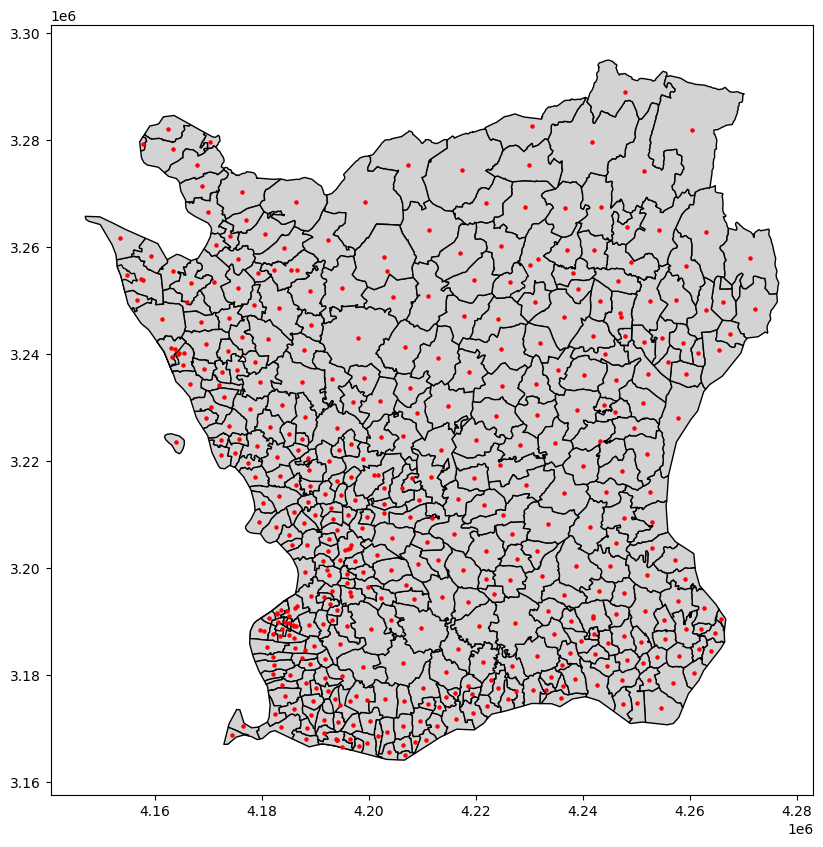

In [26]:
fig, ax = plt.subplots(figsize=(13,10))
parishScaniaMap.plot(ax=ax, column = "G_NAME", edgecolor='black', legend=False, color = 'lightgray')
centroidParishScania.plot(ax=ax, marker = 'o', markersize = 5, label = 'Centroids', color = 'red')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#plt.legend()
plt.show()


Compute the Euclidian distance in meters between centroids of each polygon projected onto the plane

In [44]:
nPolygons = len(parishScaniaMap)
distance_matrix_meters = np.zeros((nPolygons,nPolygons))
distance_matrix_km = np.zeros((nPolygons,nPolygons))

for i in range(nPolygons):
    centroid_i = parishScaniaMap.loc[i,'CentroidByPolygon']
    for j in range(i+1, nPolygons):
        centroid_j = parishScaniaMap.loc[j,'CentroidByPolygon']
        distance = centroid_i.distance(centroid_j)
        distance_matrix_meters[i,j] = distance # in meters
        distance_matrix_meters[j,i] = distance # in meters  
        distance_matrix_km[i,j] = distance/1000 # in km
        distance_matrix_km[j,i] = distance/1000 # in km

#print(distance_matrix_km)   

In [28]:
type(distance_matrix_meters)

numpy.ndarray

In [29]:
type(distance_matrix_meters)

labels = []
for i in range(len(parishScaniaMap)):
    labels.append(parishScaniaMap.loc[i,'G_NAME'])

In [30]:
type(labels)

list

In [43]:
# Create a dataframe from the distance matrix
distance_matrix = pd.DataFrame(distance_matrix_meters)

#Rename the columns and rows
distance_matrix.columns = labels
distance_matrix.rows = labels

#Print the updated distance matrix
#distance_matrix.head()

/var/folders/d7/7wsj4qr14nz8ps73mjd1y9hm0000gp/T/ipykernel_25335/1881641458.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  distance_matrix.rows = labels


In [32]:
# Export the distance matrix to a csv file
distance_matrix.to_csv('distance_matrix.csv', encoding='utf-8', index=True, header=True)

To have access to a submatrix. First, we define the row and column ranges for the submatrix

In [33]:
row_start, row_end = 10, 12
col_start, col_end = 10, 12

Access the submatrix using slicing

In [34]:
submatrix = [row[col_start:col_end] for row in distance_matrix[row_start:row_end]]
print(submatrix)

['ML', 'ÖR', 'AD', 'S ', 'ÖR', 'ÖR', 'AM', 'VS', 'IN', 'RS', 'SA', 'S ', ' F', ' F', 'FÖ', 'RS', 'RS', 'ÖR', 'ML', 'AR', 'RS', 'RS', 'RS', 'ML', 'NG', 'LI', 'AM', 'FÖ', 'LF', 'FÖ', 'RS', 'RS', 'FÖ', ' F', 'S ', 'MS', 'FÖ', 'AM', 'ÖR', 'S ', 'EL', ' F', ' F', 'SA', 'AR', 'AM', 'ÖR', 'ES', ' F', 'S ', 'SA', 'SA', 'A ', 'ML', 'GB', 'RP', 'SA', 'ÖR', 'FÖ', 'AM', 'S ', 'AM', 'AM', 'BY', 'RS', 'AM', 'ÖR', 'FÖ', 'RS', 'PS', 'BY', 'ÖR', 'FÖ', 'AM', 'ML', 'SA', 'RS', ' F', 'FÖ', 'E ', 'EL', 'VL', 'AM', 'ÖR', 'ÖR', 'GE', ' F', 'RS', 'RS', 'RP', 'ÖR', ' F', 'ÖR', 'ÖR', 'SA', 'FÖ', 'ÖR', 'FÖ', 'RS', 'AM', 'PS', 'IE', 'AM', 'AM', 'S ', 'AM', 'ÖR', 'ÖR', 'RS', 'AM', 'AM', 'SA', 'RS', 'FÖ', 'ÖR', 'SA', 'SA', ' F', 'RS', 'RS', 'FÖ', 'Ö ', 'RS', 'ÖR', 'AM', 'RS', 'BY', 'FÖ', 'RS', 'A ', 'SA', ' F', 'FÖ', 'ÖR', 'FÖ', ' F', 'SA', 'SA', 'RS', ' F', 'ÖR', 'ÖR', 'FÖ', 'SA', 'LI', 'ES', 'NG', 'FÖ', 'SA', 'FÖ', 'SA', 'ÖR', 'S ', 'S ', 'S ', 'ÖR', 'ME', ' F', 'RS', 'SA', 'TA', 'S ', 'AR', 'AM', ' F', 'RS', 'RS

In [42]:
#print(distance_matrix)

To calculate the distance between two points given their latitude and longitude, you can use the Haversine formula. The Haversine formula (see https://en.wikipedia.org/wiki/Haversine_formula) calculates the great-circle distance between two points on a sphere, which is an approximation for the Earth's surface.

Getting access to the coordinates of each centroid:

In [36]:
x_coord = gpd.GeoSeries(centroidParishScania[0]).iloc[0].x
y_coord = gpd.GeoSeries(centroidParishScania[0]).iloc[0].y
print([x_coord, y_coord])

[4162353.095562172, 3282055.860910411]


In [37]:
def getCoordinates(centroidParishScania: gpd.GeoSeries):
    longitude = gpd.GeoSeries(centroidParishScania).iloc[0].x
    latitude = gpd.GeoSeries(centroidParishScania).iloc[0].y
    return [latitude,longitude]

print(getCoordinates(centroidParishScania[0]),getCoordinates(centroidParishScania[1]))


[3282055.860910411, 4162353.095562172] [3279338.7830117564, 4157750.0618345523]


Defining the Haversine distance:

In [38]:
import math

def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    #c = 2 * math.asin(math.sqrt(a))

    # Earth radius in kilometers (mean radius)
    R = 6371.01

    # Calculate the distance
    distance = R * c

    return distance

# Example usage
distance = haversine_distance(40.7128, -74.0060, 34.0522, -118.2437)
print(distance, "kilometers")

haversine_distance(getCoordinates(centroidParishScania[0])[0], getCoordinates(centroidParishScania[0])[
                   1], getCoordinates(centroidParishScania[1])[0], getCoordinates(centroidParishScania[1])[1])



3935.7524322054765 kilometers


17205.486192064203

Using Haversine formula to compute the distance between the polygons' centroids:

In [39]:
nPolygons = len(parishScaniaMap)
Haversine_distance_matrix = np.zeros((nPolygons,nPolygons))

for i in range(len(centroidParishScania)):
    for j in range(i + 1, len(centroidParishScania)):
        distance = haversine_distance(getCoordinates(centroidParishScania[i])[0], getCoordinates(centroidParishScania[i])[
                                      1], getCoordinates(centroidParishScania[j])[0], getCoordinates(centroidParishScania[j])[1])
        Haversine_distance_matrix[i, j] = distance
        Haversine_distance_matrix[j, i] = distance
        #print(Haversine_distance_matrix)
        #print(f"The Haversine distance between centroid {i+1} and centroid {j+1} is {distance} meters")

In [41]:
# Create a dataframe from the distance matrix
#Haversine_distance_matrix = pd.DataFrame(Haversine_distance_matrix)

#Rename the columns and rows
#Haversine_distance_matrix.columns = labels
#Haversine_distance_matrix.rows = labels

#Print the updated distance matrix
#Haversine_distance_matrix.head()

# Export the distance matrix to a csv file
#Haversine_distance_matrix.to_csv('Haversine_distance_matrix.csv', encoding='utf-8', index=True, header=True)

Plotting

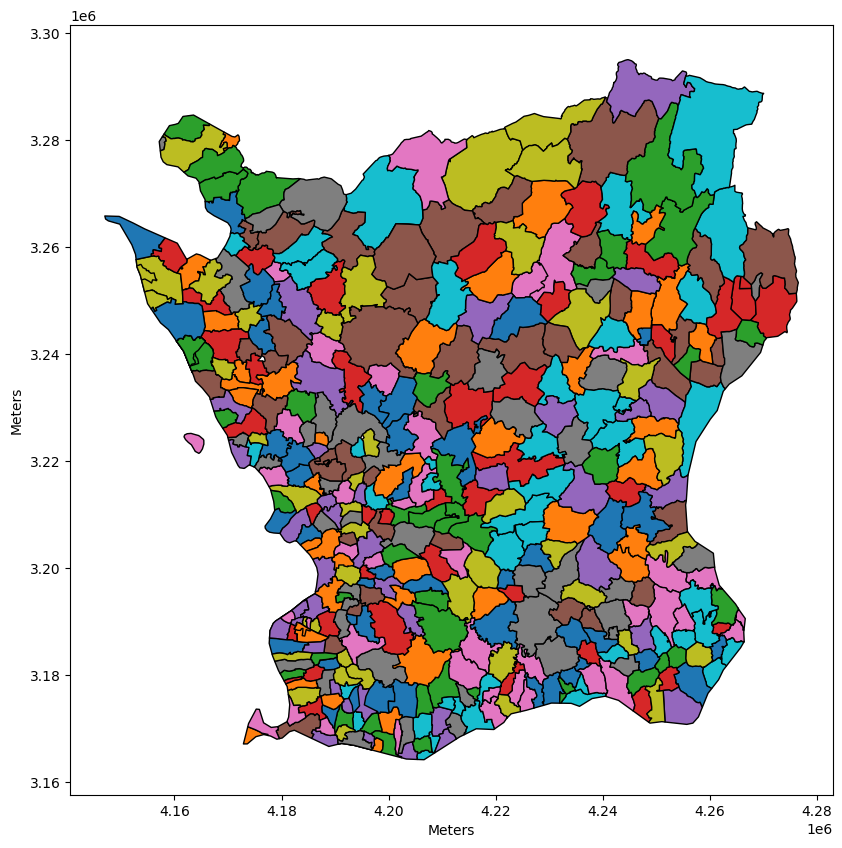

In [ ]:
fig,ax = plt.subplots(figsize=(13,10))
parishScaniaMap.plot(ax=ax, column = "G_NAME", edgecolor='black', legend=False)
plt.xlabel('Meters')
plt.ylabel('Meters')
# legend = ax.get_legend()
# legend.set_bbox_to_anchor((1, 0.2))
plt.show()

In [ ]:
parishScaniaMap.columns

Index(['G_NAME', 'GET_END_YE', 'GET_START_', 'G_UNIT_TYP', 'G_UNIT', 'G_SEQ',
       'geometry', 'area_m2 ', 'area_km2 '],
      dtype='object')

<Axes: >

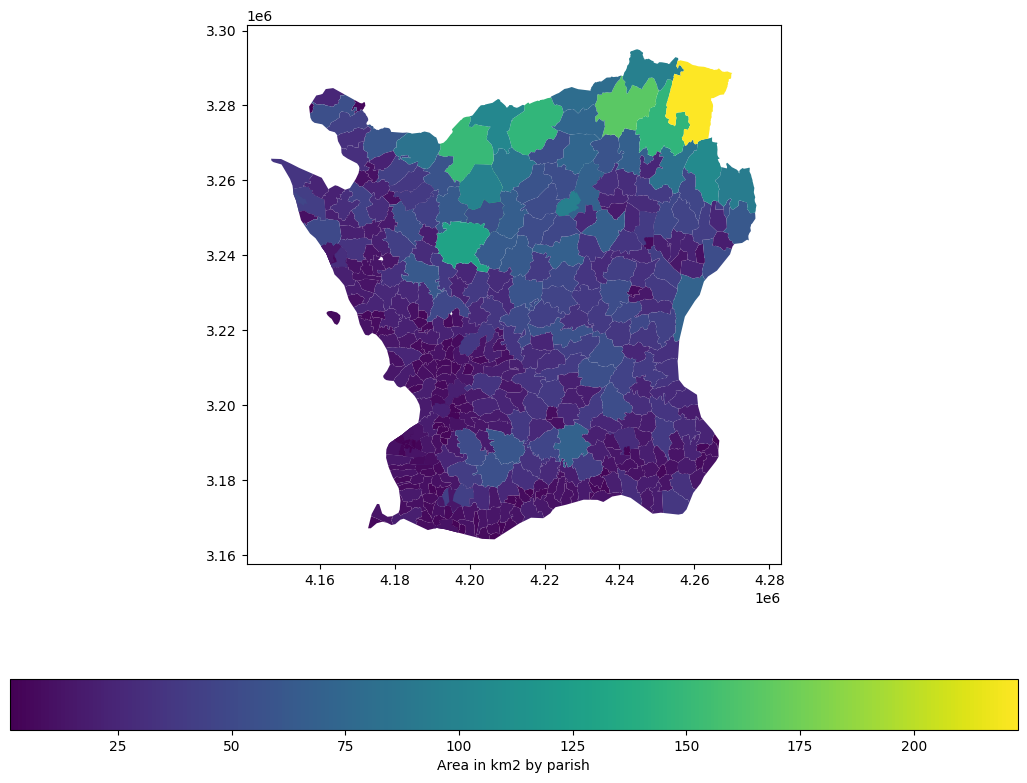

In [ ]:
fig,ax = plt.subplots(figsize=(13,10))
parishScaniaMap.plot(column = "area_km2 ", ax=ax,legend=True,
                     legend_kwds={'label': "Area in km2 by parish", 'orientation': "horizontal"}
                     )